<a href="https://colab.research.google.com/github/nasyawa/PCVK_GANJIL_2023/blob/main/Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODUL 9 –
Morfologi (Erosi, Dilasi, Opening, Closing,
Transformasi Top-hat dan Bottom-hat, Skeleton, Thickening)

import folder yang ada di Drive Anda

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import beberapa library

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV

In [64]:
def dilasi_citra(F, w):
  p,q = F.shape
  imgD = np.zeros((p,q), dtype=np.uint8)
  SED = np.ones((w,w),dtype=np.uint8)
  constant1 = (w-1)//2

  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1,j-constant1:j+constant1+1]
      product = temp*SED
      imgD[i,j] = np.max(product)

  return imgD

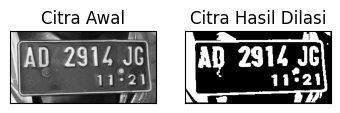

In [69]:
#img_d = cv2.imread('/content/drive/MyDrive/PCVK/plat.jpeg', 0)
img_d = cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w = 3
imgD = dilasi_citra(thresh, w)

plt.subplot(131),plt.imshow(img_d, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,

In [84]:
img = cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg')
ret, thresh = cv2.threshold(img, 156, 200, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


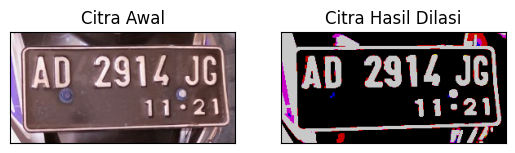

In [85]:
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()


5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV,

In [59]:
def erosi_citra(F,k):
  m, n = F.shape

  SE = np.ones((k,k), dtype=np.uint8)
  constant = (k-1)//2

  imgE = np.zeros((m,n), dtype=np.uint8)

  for i in range(constant, m-constant):
    for j in range(constant, n-constant):
      temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp*SE
      imgE[i,j] = np.min(product)

  return imgE

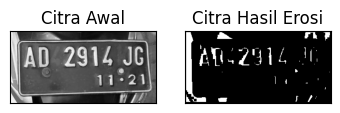

In [98]:
img_e= cv2.imread ('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 100, 90, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV

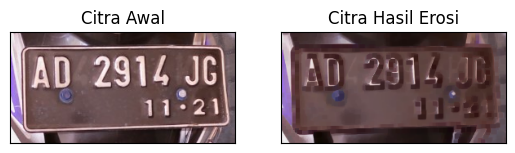

In [110]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg')
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 2)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()


 7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
 **Operasi Opening Menggunakan tanpa Library Morphology**

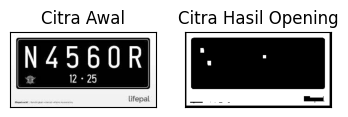

In [62]:
#Tanpa Library Morphology
img_o = cv2.imread('/content/drive/MyDrive/PCVK/plat.jpeg',0)
reto, thresho = cv2.threshold(img_o, 127, 255,cv2.THRESH_BINARY)
k = 7
imgO = dilasi_citra(erosi_citra(thresho,k),k)

plt.subplot(131),plt.imshow(img_o,cmap= 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

**Operasi Opening Menggunakan Library Morpholog**

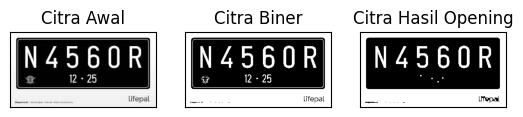

In [63]:
#Dengan Menggunakan Library
img = cv2.imread('/content/drive/MyDrive/PCVK/plat.jpeg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])
plt.show()